# Lab 5 Copy-on-Write 

## Exercise 1
Copy-on-Write is a really important concept in pandas and you will run into troubles if you are not aware of what is going on. The tricky part is that pandas is not consistent - some indexing operations may return a view others creates a copy. I pandas 3.0 they have fixed this with the new Copy-on-Write setting. But as long as we are in version 2.x we have the challenges.

a) Start reading the article https://pandas.pydata.org/docs/user_guide/copy_on_write.html and follow a long by executing the examples

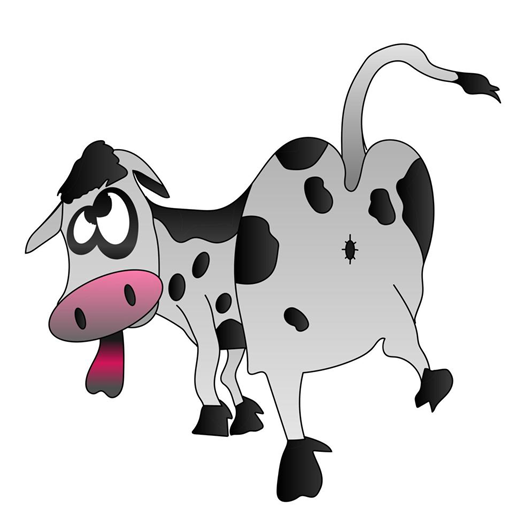

In [ ]:
# TODO  - all the example code snippets from the article

## Exercise 2 Copy on Write setting

Continue with the classroom examle Camilla showed. You will find this below. Make sure you understand the concept. To simulate you are back in standard Python 2.x either restart your Python kernel or execute this code:


In [ ]:
import pandas as pd
pd.get_option("mode.copy_on_write")

In [ ]:
# from pandas 3.0 copy on write is default - this means
pd.set_option("mode.copy_on_write", False) # default for pandas 2.x

In [ ]:

# copy on write example - first without copyonwrite
import pandas as pd
import numpy as np
df= pd.DataFrame({'A':np.linspace(0, 1, 5), 'B':np.linspace(0, 1, 5) * 2})
df

In [ ]:
# create a Series, which is colum A from df
s1=df['A']

In [ ]:
# we can assign a value here to first element in the Series
s1[0]=1000
s1

In [ ]:
# but df has also changed - so s1 references back to df['A']
df

In [ ]:
# we can also assign a value with the loc method
s1.loc[1]=2000
s1

In [ ]:
# this also has an effect on df - so s1 references back to df
df

In [ ]:
# Now we create a dataframe called df2 using slicing
df2=df[0:4]
df2

In [ ]:
# we use loc to assign a value to all rows in column A
df2.loc[:, 'A'] = 123
df2

In [ ]:
# and s1 is still just the reference, so it also shows 123
s1

In [ ]:
# what about df? df has changed two, so df2 references back to df
# we can think of df as a kind of view
df

In [ ]:
# from pandas 3.0 copy on write is default - this means
pd.set_option("mode.copy_on_write", True)

Now we repeat the example with making a Series s2 and a dataframe df2, but this time they will just be copies, because that will be default in pandas 3.0+

In [ ]:
# s2 is a copy - it's not pointing back to df 
s2=df['A']


In [ ]:
s2[0]=5000
s2

In [ ]:
# notice df has not change this time
df

## Exercise 3 chained assignment

Now go back to the standard setting in pandas 2.x, so set the cow to False. Just restart your kernel.

In [ ]:

import pandas as pd
import numpy as np
df= pd.DataFrame({'A':np.linspace(0, 1, 5), 'B':np.linspace(0, 1, 5) * 2})
df

In [ ]:
# run this without cow
# chained assignment
# Chained assignment references a technique where an object is updated through two subsequent indexing operations,

df2=df[0:5]
df2

In [ ]:
# Do you get a warning here? Are df2 and df the same now?
df2['A']=1000
df2

In [ ]:
df

In [ ]:
df2.loc[:, 'A'] = 6000

In [ ]:
df2

In [ ]:
df

In [ ]:
df2

In [ ]:
# Problem if we try to

df['A'][0]=1000

In [ ]:
# but it changed the value!
df

In [ ]:
df2

## Exercise 4 More chained assignment

In [ ]:
df= pd.DataFrame({'A':np.arange(10), 'B':np.arange(10) * 2})
s1= df['A']
s1[0]=1000
s1

In [ ]:
df

In [ ]:
df= pd.DataFrame({'A':np.arange(10), 'B':np.arange(10) * 2})
# slice of df
df2=df[0:5]
# we get a warning here - but it actually sets it - and df and df2 are no longer identical
df2['A'] = 123
df2

In [ ]:
df

In [ ]:
df= pd.DataFrame({'A':np.arange(10), 'B':np.arange(10) * 2})
# slice of df
df2=df[0:5]
df3=df[0:5]
# we get a warning here - but it actually sets it - and df and df2 are no longer identical
df2['A'] = 234
# df3 also changes df here - so df3 is just a view 
df3.loc[:,'B']=789
df2

In [ ]:
df3

In [ ]:
df